In [4]:
#📽️ Movie Data Analysis Project
#Author: Johannes PK Hamukwaya

#This project explores a movie dataset to uncover trends, patterns, and correlations
#in ratings, genres, gross revenue, and more using Python's data analysis libraries.

from google.colab import drive
drive.mount('/content/drive')

#1. Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure

#Plot style and display settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12, 8)
pd.options.mode.chained_assignment = None  # Disable warnings for chained assignments

#2. Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/movies.csv")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Display the first few rows of the dataset
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


name: 0.0% missing
rating: 1.0% missing
genre: 0.0% missing
year: 0.0% missing
released: 0.03% missing
score: 0.04% missing
votes: 0.04% missing
director: 0.0% missing
writer: 0.04% missing
star: 0.01% missing
country: 0.04% missing
budget: 28.31% missing
gross: 2.46% missing
company: 0.22% missing
runtime: 0.05% missing


<ipython-input-7-e2b3aaba7035>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.values, y=missing_data.index, palette='Reds_r')


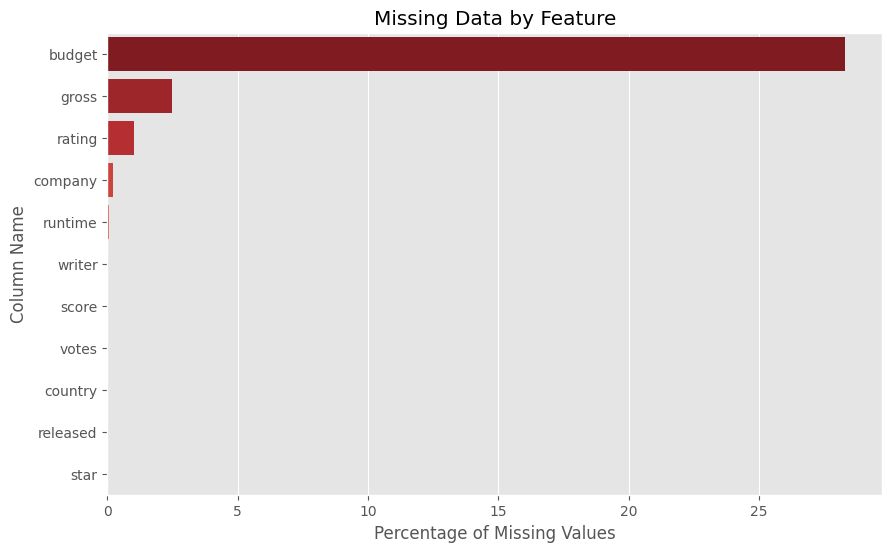

In [7]:
#Check for Missing Data in the Dataset

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col}: {round(pct_missing * 100, 2)}% missing')

#Visualize Missing Data (optional but helpful)
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if not missing_data.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_data.values, y=missing_data.index, palette='Reds_r')
    plt.xlabel('Percentage of Missing Values')
    plt.ylabel('Column Name')
    plt.title('Missing Data by Feature')
    plt.show()
else:
    print("No missing data detected.")


In [8]:
#Data Types for our columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


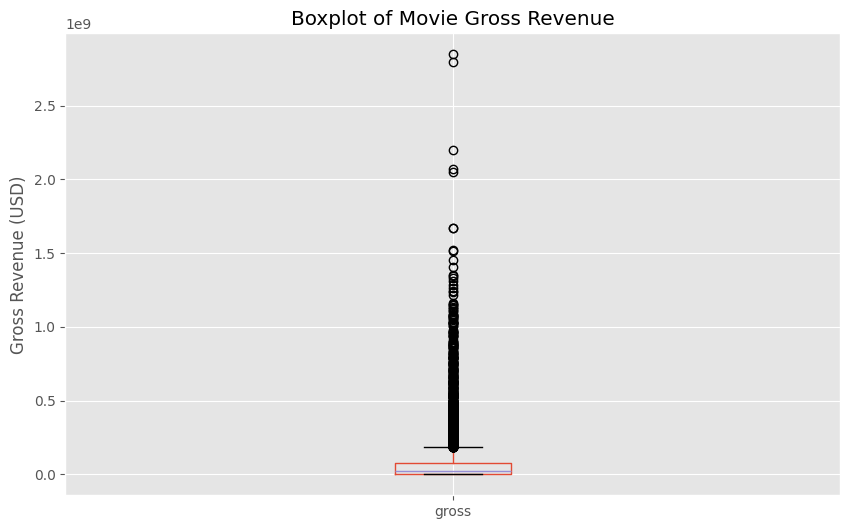

In [9]:
#Check for Outliers in the 'gross' Column

plt.figure(figsize=(10, 6))
df.boxplot(column=['gross'])
plt.title('Boxplot of Movie Gross Revenue')
plt.ylabel('Gross Revenue (USD)')
plt.show()


In [10]:
#Drop Duplicate Rows from the Dataset

df_cleaned = df.drop_duplicates()

#Check how many rows were removed
print(f"Original rows: {len(df)}")
print(f"Rows after removing duplicates: {len(df_cleaned)}")
print(f"Duplicates removed: {len(df) - len(df_cleaned)}")


Original rows: 7668
Rows after removing duplicates: 7668
Duplicates removed: 0


In [11]:
#Top Grossing Movies

top_grossing = df.sort_values(by='gross', ascending=False)

#Show the top 10 for a quick peek
top_grossing[['name', 'gross', 'year']].head(10)


,name,gross,year
5445,Avatar,2.847246e+09,2009
7445,Avengers: Endgame,2.797501e+09,2019
3045,Titanic,2.201647e+09,1997
6663,Star Wars: Episode VII - The Force Awakens,2.069522e+09,2015
7244,Avengers: Infinity War,2.048360e+09,2018
7480,The Lion King,1.670728e+09,2019
6653,Jurassic World,1.670516e+09,2015
6043,The Avengers,1.518816e+09,2012
6646,Furious 7,1.515341e+09,2015
7494,Frozen II,1.450027e+09,2019


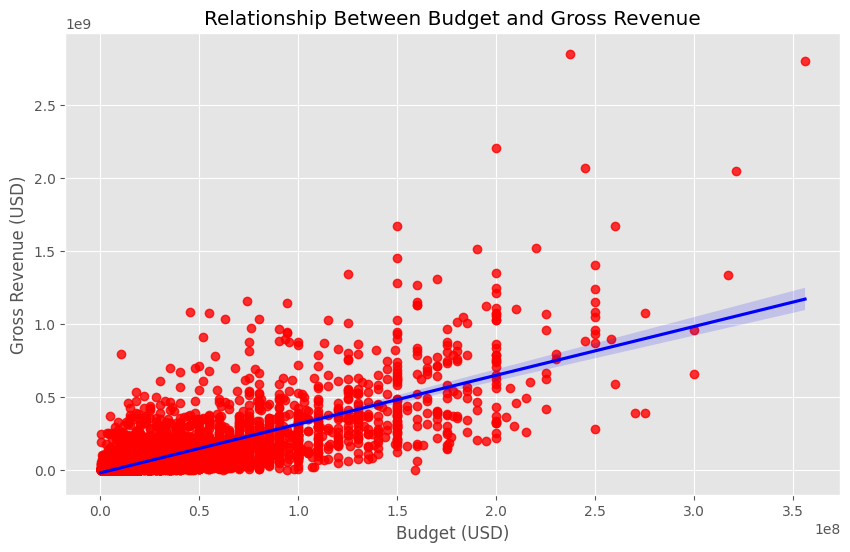

In [12]:
#Regression Plot: Budget vs Gross Revenue

plt.figure(figsize=(10, 6))
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Relationship Between Budget and Gross Revenue")
plt.xlabel("Budget (USD)")
plt.ylabel("Gross Revenue (USD)")
plt.show()


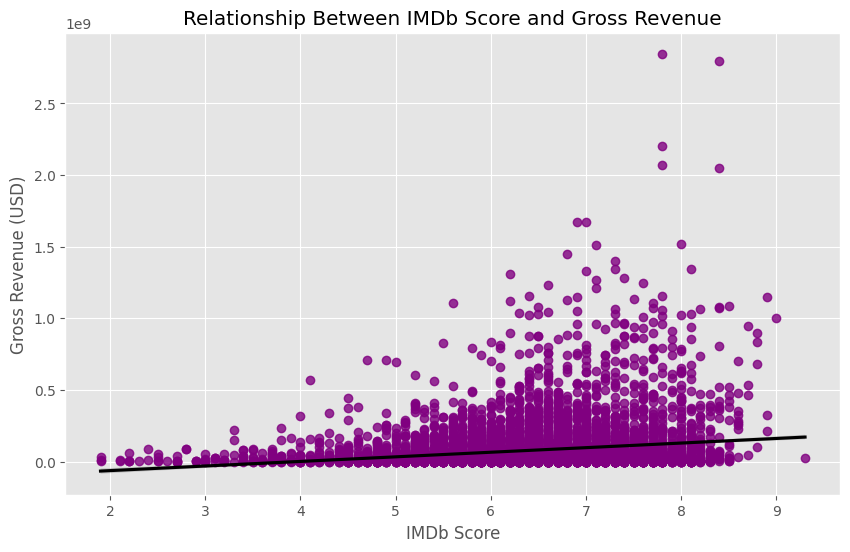

In [13]:
#Regression Plot: IMDb Score vs Gross Revenue

plt.figure(figsize=(10, 6))
sns.regplot(x="score", y="gross", data=df, scatter_kws={"color": "purple"}, line_kws={"color": "black"})
plt.title("Relationship Between IMDb Score and Gross Revenue")
plt.xlabel("IMDb Score")
plt.ylabel("Gross Revenue (USD)")
plt.show()


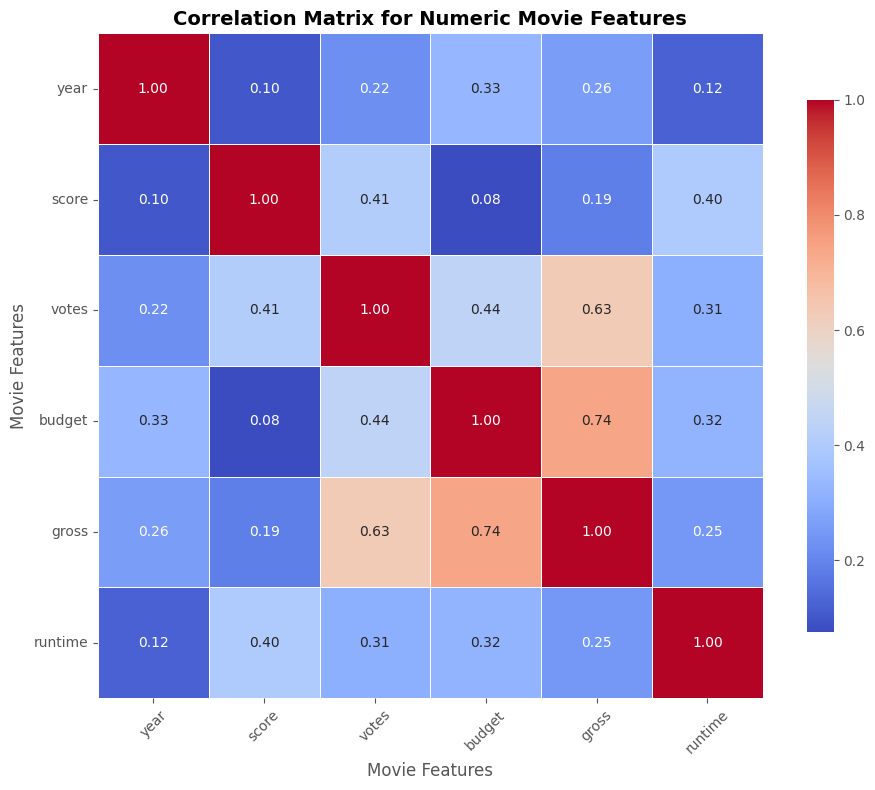

In [17]:
#Correlation Heatmap for Numeric Features

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.8})

plt.title("Correlation Matrix for Numeric Movie Features", fontsize=14, fontweight='bold')
plt.xlabel("Movie Features", fontsize=12)
plt.ylabel("Movie Features", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [18]:
#Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.143938,0.036367,0.965761,0.959015,-0.046733,0.287776,0.745905,0.805211,0.731565,0.142828,0.277488,0.947324,0.591667,0.048955
rating,0.143938,1.000000,-0.086723,0.156713,0.146606,0.012595,0.099972,0.085520,0.103623,0.093116,0.000494,0.193353,0.158582,-0.028035,0.032741
genre,0.036367,-0.086723,1.000000,0.037184,0.035940,-0.002437,0.023285,0.047288,0.033688,0.038649,-0.015795,0.073008,0.038616,0.009566,0.001462
year,0.965761,0.156713,0.037184,1.000000,0.993190,-0.044981,0.312401,0.770497,0.824770,0.756400,0.140216,0.300621,0.980873,0.601571,0.050647
released,0.959015,0.146606,0.035940,0.993190,1.000000,-0.045761,0.299905,0.770876,0.819617,0.754468,0.148468,0.285691,0.976423,0.607954,0.048235
score,-0.046733,0.012595,-0.002437,-0.044981,-0.045761,1.000000,-0.009749,-0.022687,-0.034685,-0.009896,0.023097,-0.012642,-0.047041,-0.028432,0.026436
votes,0.287776,0.099972,0.023285,0.312401,0.299905,-0.009749,1.000000,0.192220,0.224122,0.179601,-0.045914,0.398519,0.286180,0.008900,0.106024
director,0.745905,0.085520,0.047288,0.770497,0.770876,-0.022687,0.192220,1.000000,0.748340,0.682385,0.155471,0.106617,0.750911,0.552258,-0.011070
writer,0.805211,0.103623,0.033688,0.824770,0.819617,-0.034685,0.224122,0.748340,1.000000,0.675685,0.157202,0.187238,0.805576,0.546151,0.032264
star,0.731565,0.093116,0.038649,0.756400,0.754468,-0.009896,0.179601,0.682385,0.675685,1.000000,0.182045,0.107991,0.735680,0.527116,0.035392


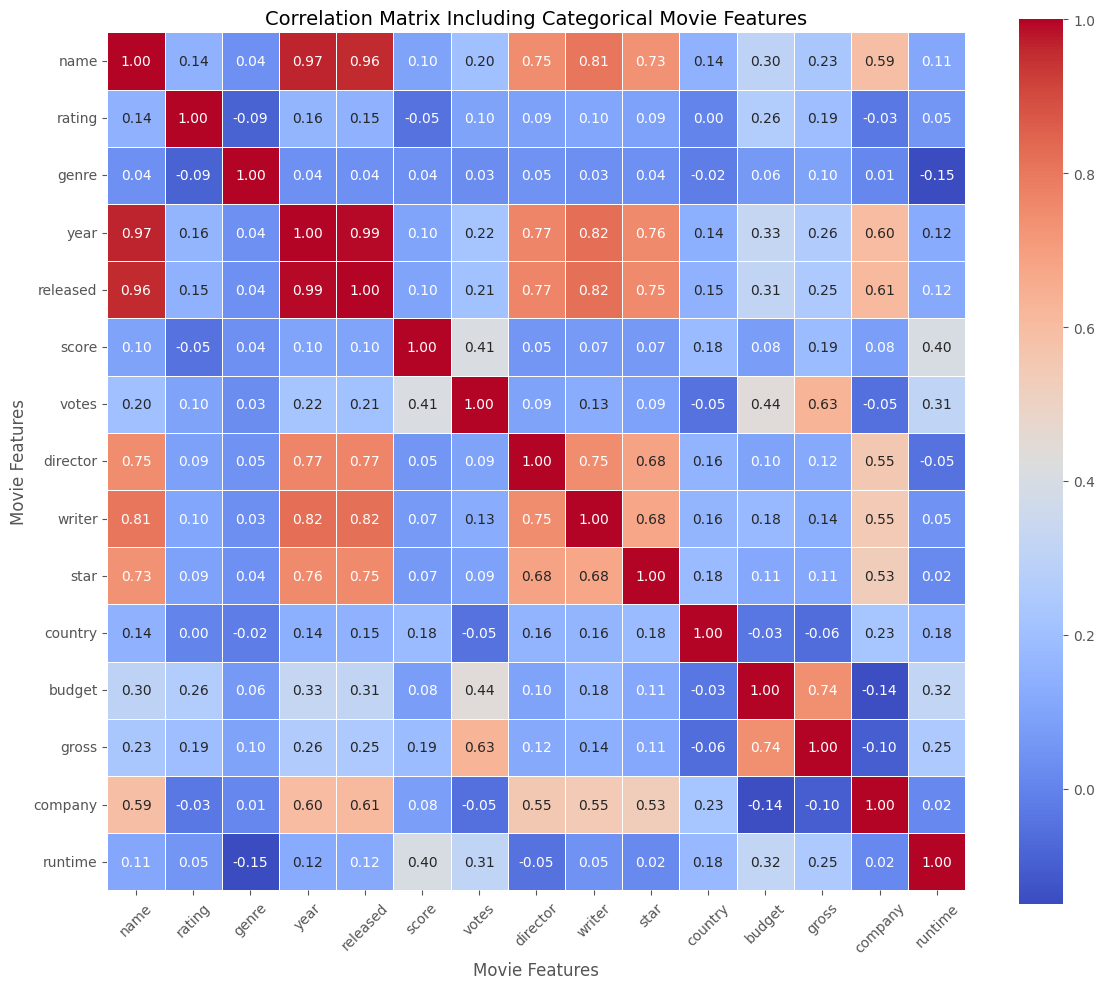

In [19]:
#Convert Categorical Columns to Numeric Codes and Compute Correlation Matrix

correlation_matrix = df.apply(lambda x: x.factorize()[0] if x.dtype == 'object' else x).corr(method='pearson')

# Heatmap Visualization

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5,
            square=True)

plt.title("Correlation Matrix Including Categorical Movie Features", fontsize=14)
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [20]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.143938
         genre       0.036367
         year        0.965761
         released    0.959015
                       ...   
runtime  country     0.124154
         budget      0.112097
         gross       0.042978
         company     0.005137
         runtime     1.000000
Length: 225, dtype: float64


In [21]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

company  budget    -0.092249
budget   company   -0.092249
genre    rating    -0.086723
rating   genre     -0.086723
country  budget    -0.082082
                      ...   
budget   budget     1.000000
country  country    1.000000
gross    gross      1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [ ]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

director  name        0.504802
name      director    0.504802
gross     director    0.507853
director  gross       0.507853
budget    writer      0.674068
writer    budget      0.674068
          votes       0.677493
votes     writer      0.677493
name      writer      0.695995
writer    name        0.695995
gross     writer      0.700464
writer    gross       0.700464
budget    votes       0.955916
votes     budget      0.955916
name      votes       0.960618
votes     name        0.960618
budget    name        0.965431
name      budget      0.965431
votes     gross       0.974594
gross     votes       0.974594
budget    gross       0.978268
gross     budget      0.978268
          name        0.984267
name      gross       0.984267
budget    budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross   

In [22]:
#Group by 'company' and sum the gross revenue
company_gross_sum = df.groupby('company')[["gross"]].sum()

#Sort the companies by total gross revenue in descending order
top_15_companies = company_gross_sum.sort_values('gross', ascending=False).head(15)

#Ensure the data type is consistent
top_15_companies['gross'] = top_15_companies['gross'].astype('int64')

#Display the result
print(top_15_companies)


                                 gross
company                               
Warner Bros.               56491421806
Universal Pictures         52514188890
Columbia Pictures          43008941346
Paramount Pictures         40493607415
Twentieth Century Fox      40257053857
Walt Disney Pictures       36327887792
New Line Cinema            19883797684
Marvel Studios             15065592411
DreamWorks Animation       11873612858
Touchstone Pictures        11795832638
Dreamworks Pictures        11635441081
Metro-Goldwyn-Mayer (MGM)   9230230105
Summit Entertainment        8373718838
Pixar Animation Studios     7886344526
Fox 2000 Pictures           7443502667


<ipython-input-23-24142baa43b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_companies['gross'], y=top_15_companies.index, palette='rocket')


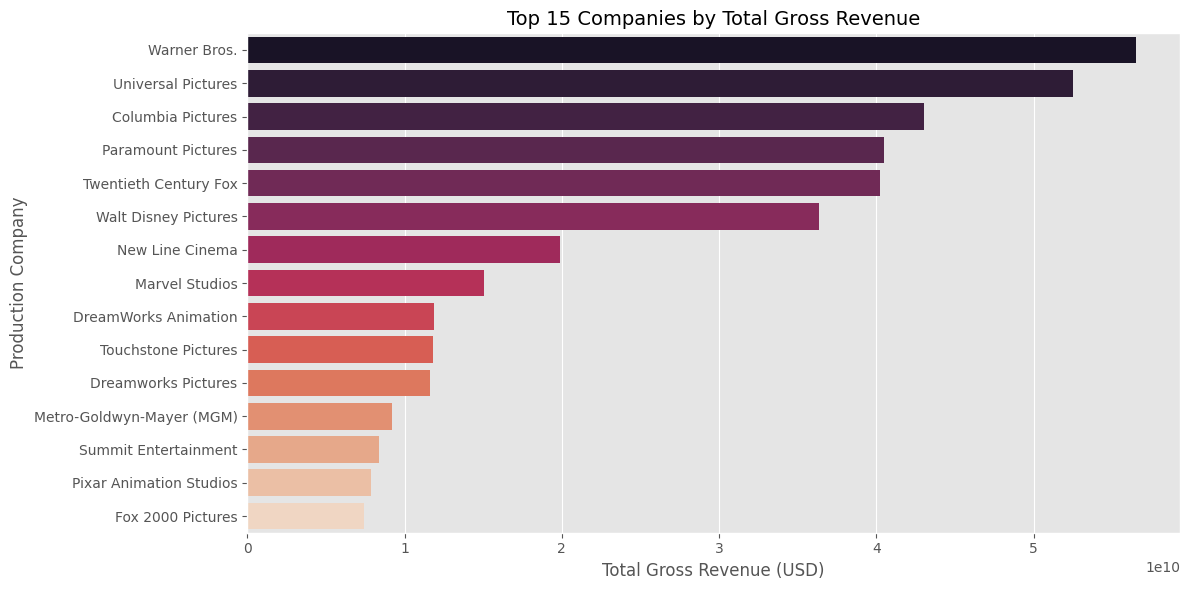

In [23]:
#Barplot of the top 15 grossing companies

plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_companies['gross'], y=top_15_companies.index, palette='rocket')

plt.title("Top 15 Companies by Total Gross Revenue", fontsize=14)
plt.xlabel("Total Gross Revenue (USD)", fontsize=12)
plt.ylabel("Production Company", fontsize=12)
plt.tight_layout()
plt.show()


In [24]:
df['Year'] = df['released'].astype(str).str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,Octo
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,Febr
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,Apri
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,Octo


In [26]:
df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926.0
"""Weathering With You"" Film Partners",2019,193457467.0
.406 Production,1996,10580.0
1+2 Seisaku Iinkai,2000,1196218.0
10 West Studios,2010,814906.0
...,...,...
i am OTHER,2015,17986781.0
i5 Films,2001,10031529.0
iDeal Partners Film Fund,2013,506303.0


In [27]:

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [28]:

CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')

CompanyGrossSumSorted

,gross
company,
Warner Bros.,56491421806
Universal Pictures,52514188890
Columbia Pictures,43008941346
Paramount Pictures,40493607415
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19883797684
Marvel Studios,15065592411
DreamWorks Animation,11873612858


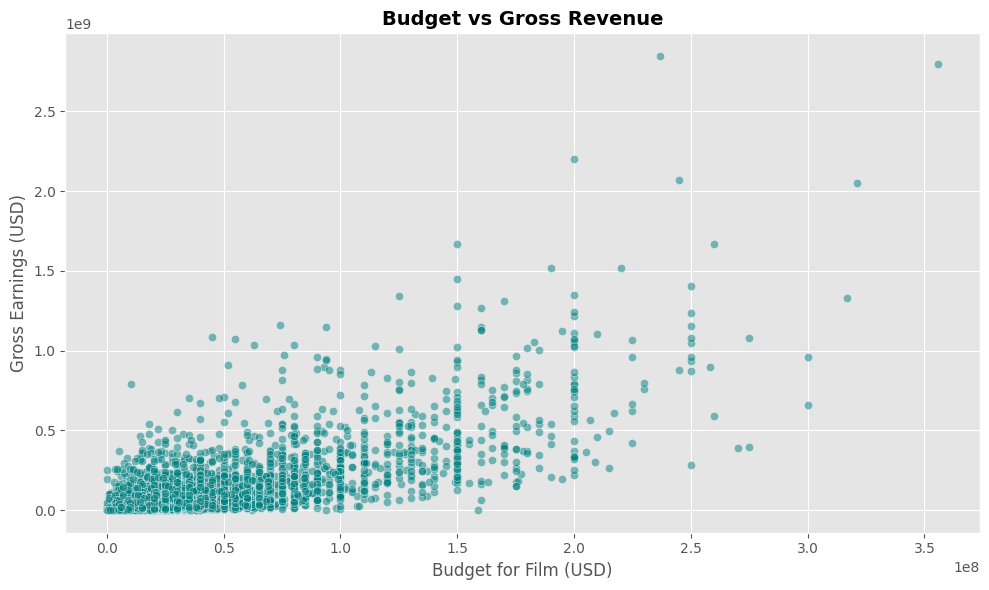

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5, color='teal', edgecolors='w', linewidth=0.5)

plt.title('Budget vs Gross Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Budget for Film (USD)', fontsize=12)
plt.ylabel('Gross Earnings (USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,Octo
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,Febr
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,Apri
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,Octo


In [31]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,14
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,13
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,14
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,13
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0,18
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0,11
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN,8
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0,18


In [32]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,-0.011725
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.013475
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,0.028397
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,-0.001562
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,0.993694
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.040993
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.017337
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.000105
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.002892
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,0.015406


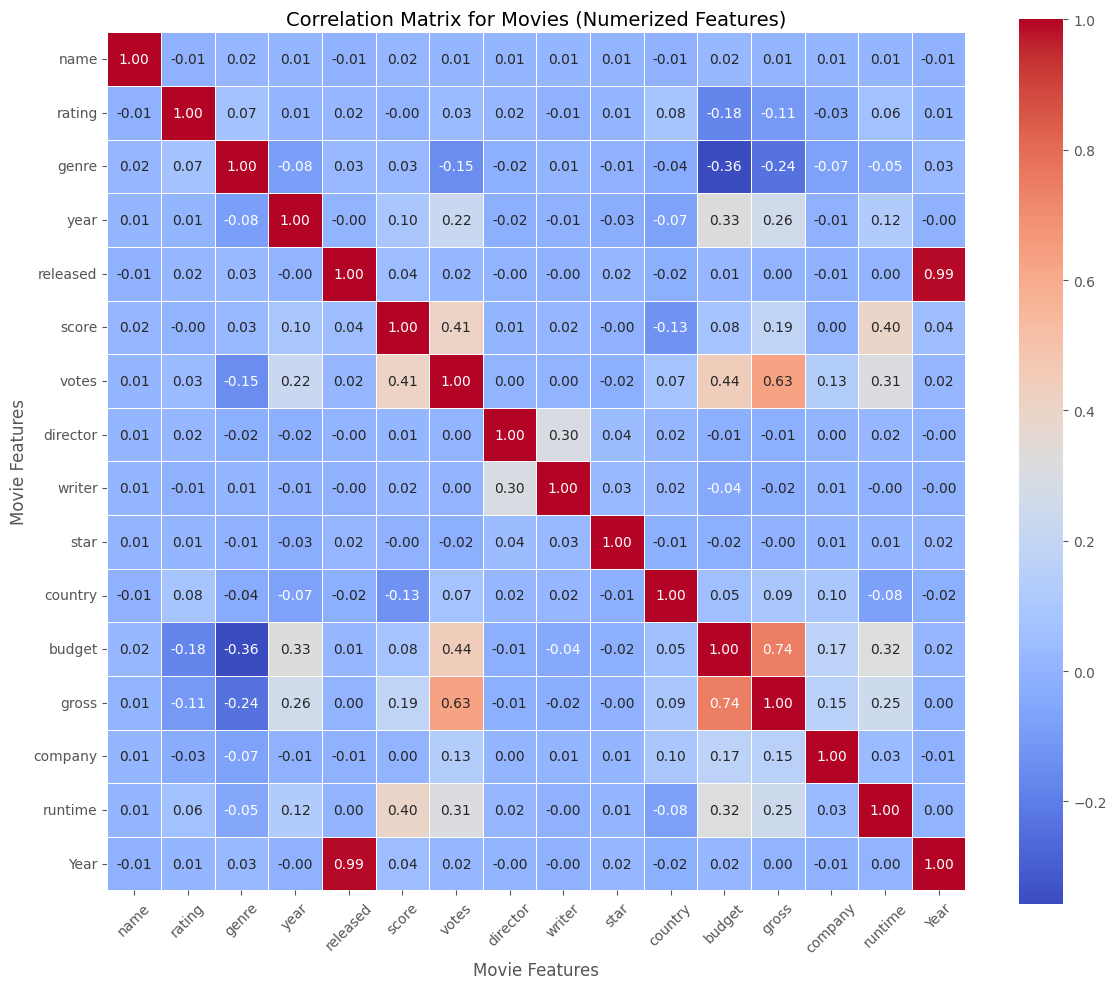

In [33]:
#Correlation Matrix on Numerized Dataset (Includes Factorized Categorical Features)

correlation_matrix = df_numerized.corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5,
            square=True)

plt.title("Correlation Matrix for Movies (Numerized Features)", fontsize=14)
plt.xlabel("Movie Features", fontsize=12)
plt.ylabel("Movie Features", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [34]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,1393,16,1918,6,37757.0,1971,8,2398,120,6.7,1558,2411,2831,2016,NaN,NaN,31
1871,0.0,1680,54,2145,4,18137661.0,3332,7,667,110,5.5,1633,9880,1993,1994,NaN,NaN,8
1852,0.0,2062,54,1564,7,17193886.0,3346,6,687,114,6.4,1968,24126,4034,1994,NaN,NaN,8
1854,0.0,1544,54,645,4,1596700.0,1031,8,636,102,5.0,2342,4804,1885,1994,NaN,NaN,8
1855,0.0,1811,16,1968,3,2017346.0,4026,8,691,159,7.5,925,14377,123,1994,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,1491,54,1412,0,459005868.0,502,7,2239,141,7.4,2001,537832,2145,2015,NaN,NaN,29
6194,250000000.0,1582,34,2045,1,255119788.0,5420,7,2207,144,7.4,911,396797,1231,2014,NaN,NaN,28
4637,258000000.0,664,54,2317,0,336530303.0,4632,7,1615,139,6.2,2334,416842,3541,2007,NaN,NaN,21
5293,260000000.0,2119,54,1882,2,200821936.0,4877,6,1876,100,7.8,1536,325621,749,2010,NaN,NaN,24


<ipython-input-37-37ef0376f1a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="rating", y="gross", data=df, jitter=True, palette="Set2", alpha=0.7)


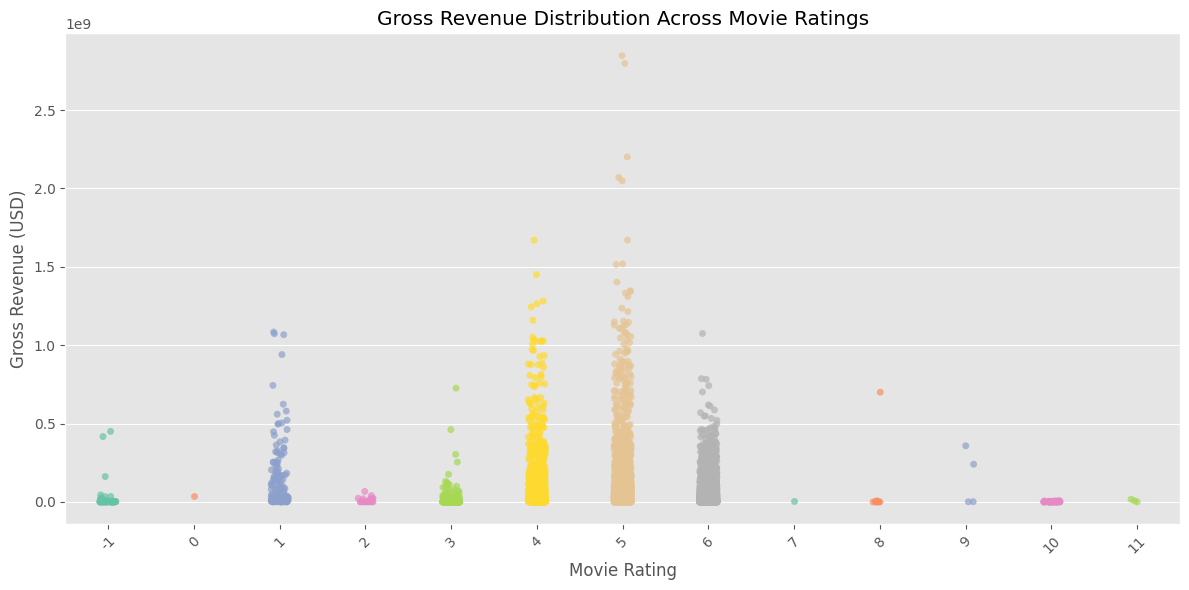

In [37]:
#Gross Revenue Distribution by Rating

plt.figure(figsize=(12, 6))
sns.stripplot(x="rating", y="gross", data=df, jitter=True, palette="Set2", alpha=0.7)

plt.title("Gross Revenue Distribution Across Movie Ratings")
plt.xlabel("Movie Rating")
plt.ylabel("Gross Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
